<a href="https://colab.research.google.com/github/nithyashabarikannan/Data-Analytics-Machine-Learning-/blob/main/Electric%20Vehicle%20Sentiment%20and%20Topic%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy==1.24.3 pandas==1.5.3


  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0


In [ ]:
!pip install pyLDAvis

In [ ]:
pip install pyLDAvis pandas==1.5.3


In [ ]:
import numpy as np
print(np.__version__)

1.26.0


In [ ]:
pip install --upgrade numpy

  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [ ]:
# Loading primary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Provide the file path as a string enclosed in quotes
file_path = "/content/drive/MyDrive/Colab Notebooks/EV_community_discussion_data.xlsx"

# Read the Excel file into a DataFrame
df_ev = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify the data
df_ev.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest
0,tw1,2020-08-05,11:42:01,9468852,cbartens,Brilliant! The Good Car Company - Affordable #...,0,0,0,"['#electriccars', '#nissan']",NaN
1,tw1356,2020-08-05,10:59:42,3029729586,david_day_,Time for Australia to wake up or risk becoming...,0,3,2,[],NaN
2,tw1357,2020-08-05,07:47:53,778919486,myoldfriend2008,I want to see a stock appearing race car not a...,0,0,0,[],NaN
3,tw689,2020-08-04,12:57:24,2434883094,kateccranney,I never thought I'd be nerding out on car sale...,0,1,2,['#electricvehicle'],NaN
4,tw1358,2020-08-04,22:26:15,1375696142,neillade,Australia when? Peugeot is missing out. Merced...,0,0,0,[],NaN


In [ ]:
import pandas as pd

# Provide the file path as a string enclosed in quotes
file_path = "/content/drive/MyDrive/Colab Notebooks/EV_community_discussion_data.xlsx"

# Create a dictionary to store DataFrames for each data source
data_source_dfs = {}

# List of sheet names (adjust these to match your sheet names)
sheet_names = ["Twitter", "Whirlpool", "Ozbargain", "Reddit"]

# Loop through the sheet names and read each sheet into a DataFrame
for sheet_name in sheet_names:
    data_source_dfs[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name)

# You can now access each DataFrame using its corresponding data source name
twitter_df = data_source_dfs["Twitter"]
whirlpool_df = data_source_dfs["Whirlpool"]
Ozbargain_df = data_source_dfs["Ozbargain"]
reddit_df = data_source_dfs["Reddit"]

# You can perform operations on each DataFrame separately
# For example, you can print the first few rows of the Twitter DataFrame
print(" Ozbargain Data:")
print(Ozbargain_df.head())

# Similarly, you can work with other DataFrames as needed


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 Ozbargain Data:
   id                                     review_content       date     Source
0  O1  Now it's pretty obvious that conventional auto... 2020-02-20  Ozbargain
1  O2  There could be an initial confusion from new c... 2020-02-20  Ozbargain
2  O3  I'll elaborateâ€¦ Personally, I see EV take-up... 2020-02-20  Ozbargain
3  O4  I'm curious to see how the LiS batteries chang... 2020-02-20  Ozbargain
4  O5  Also C) when more model options are released t... 2020-02-20  Ozbargain


In [ ]:
print("Ozbargain Data:")
print(Ozbargain_df.head())


Ozbargain Data:
   id                                     review_content       date     Source
0  O1  Now it's pretty obvious that conventional auto... 2020-02-20  Ozbargain
1  O2  There could be an initial confusion from new c... 2020-02-20  Ozbargain
2  O3  I'll elaborateâ€¦ Personally, I see EV take-up... 2020-02-20  Ozbargain
3  O4  I'm curious to see how the LiS batteries chang... 2020-02-20  Ozbargain
4  O5  Also C) when more model options are released t... 2020-02-20  Ozbargain


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Ozbargain_df = Ozbargain_df[['date', 'review_content']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Ozbargain_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,review_content
0,2020-02-20,Now it's pretty obvious that conventional auto...
1,2020-02-20,There could be an initial confusion from new c...
2,2020-02-20,"I'll elaborateâ€¦ Personally, I see EV take-up..."
3,2020-02-20,I'm curious to see how the LiS batteries chang...
4,2020-02-20,Also C) when more model options are released t...


Pre - Processing

In [ ]:
Ozbargain_df['review_content'] = Ozbargain_df['review_content'].str.lower()
Ozbargain_df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-db7438e488c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ozbargain_df['review_content'] = Ozbargain_df['review_content'].str.lower()


,date,review_content
1068,2018-12-20,unfortunately the fast charge leads will only ...
1069,2018-12-20,"i suspect that in the not too distant future, ..."
1070,2018-12-20,2040 we just want to live long enough to see t...
1071,2018-12-21,looking at road fatalities by the human driver...
1072,2018-12-23,everything old is new again. 1909 electric car...


Regular Expression

In [ ]:
# Define a function to remove Twitter IDs and URLs from tweets
def remove_twitter_ids(review_content):
    # Use a regular expression pattern to remove Twitter IDs, URLs, and non-alphanumeric characters
    clean_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(review_content))
    # Remove extra spaces
    clean_tweet = re.sub(r"\s+", " ", clean_tweet).strip()
    return clean_tweet

# Apply the 'remove_twitter_ids' function to the 'tweet' column
Ozbargain_df['review_content'] = Ozbargain_df['review_content'].apply(remove_twitter_ids)

# Display the modified DataFrame
Ozbargain_df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-f4541bac06d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ozbargain_df['review_content'] = Ozbargain_df['review_content'].apply(remove_twitter_ids)


,date,review_content
1068,2018-12-20,unfortunately the fast charge leads will only ...
1069,2018-12-20,i suspect that in the not too distant future s...
1070,2018-12-20,2040 we just want to live long enough to see this
1071,2018-12-21,looking at road fatalities by the human driver...
1072,2018-12-23,everything old is new again 1909 electric car ...


Duplicate Removal

In [ ]:
# Check duplicate tweets count
duplicate_count = len(Ozbargain_df['review_content'])-len(Ozbargain_df['review_content'].drop_duplicates())
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', Ozbargain_df.shape[0])

duplicate count: 15
total records before remove duplicates: 1073


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# drop duplicates (keep the last tweet of each of the duplicates)
Ozbargain_df = Ozbargain_df.drop_duplicates(subset='review_content', keep="first")
print('updated record count:', Ozbargain_df.shape[0])

updated record count: 1058


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove punctuations
Ozbargain_df['review_content'] = Ozbargain_df['review_content'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.
Ozbargain_df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-69dab97ead29>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Ozbargain_df['review_content'] = Ozbargain_df['review_content'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.
<ipython-input-17-69dab97ead29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ozbargain_df['review_content'] = Ozbargain_df['review_c

,date,review_content
1068,2018-12-20,unfortunately the fast charge leads will only ...
1069,2018-12-20,i suspect that in the not too distant future s...
1070,2018-12-20,2040 we just want to live long enough to see this
1071,2018-12-21,looking at road fatalities by the human driver...
1072,2018-12-23,everything old is new again 1909 electric car ...


Stop words and Domain related removal

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


✨🍰✨ Everything looks OK!


In [ ]:
!conda create -n myenv python=3.7
!conda activate myenv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Solving environment: - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4



## Package Plan ##

  environment location: /usr/local/envs/myenv

  added / updated specs:
    - python=3.7


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  ca-certificates    conda-forge/linux-64::ca-certificates-2023.7.22-hbcca054_0 
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.40-h41732ed_0 
  libffi             conda-forge/linux-64::libffi-3.4.2-h7f98852_5 
  libgcc-ng          conda-forge/linux-64::libgcc-ng-13.2.0-h807b86a_2 
  libgomp            conda-forge/linux-64::libgomp-13.2.0-h80

In [ ]:
!conda install -y numpy==1.24.3
!conda install -y nltk


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4



# All requested packages already installed.

Solving environment: | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4



# All requested packages already installed.



In [ ]:
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# get the list of all stopwords from the library
stop = stopwords.words('english')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop.remove('not')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assuming 'Ozbargain_df' is your DataFrame
Ozbargain_df['review_content'] = Ozbargain_df['review_content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Ozbargain_df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,review_content
1068,2018-12-20,unfortunately fast charge leads reach edge sub...
1069,2018-12-20,suspect not distant future say 2040 latest any...
1070,2018-12-20,2040 want live long enough see
1071,2018-12-21,looking road fatalities human driver not going...
1072,2018-12-23,everything old new 1909 electric car jay leno ...


In [ ]:
Ozbargain_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,review_content
0,2020-02-20,pretty obvious conventional automakers droppin...
1,2020-02-20,could initial confusion new car buyers weather...
2,2020-02-20,elaborate personally see ev take increase infr...
3,2020-02-20,curious see lis batteries change expected time...
4,2020-02-20,also c model options released market available...


Standardization

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

Ozbargain_df['review_content_stem'] = Ozbargain_df['review_content'].apply(stemming_function)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compare the content vs. stemmed content
Ozbargain_df[['review_content', 'review_content_stem']].tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_content,review_content_stem
1063,return shanghai totally gobsmacked backwards s...,return shanghai total gobsmack backward seriou...
1064,democracy highly inefficient policies made act...,democraci highli ineffici polici made actual b...
1065,almost asian countries ahead australia vietnam...,almost asian countri ahead australia vietnames...
1066,trying spend 500 600 annually car keeps going ...,tri spend 500 600 annual car keep go e buy cra...
1067,ask government make national garage network li...,ask govern make nation garag network like nbn
1068,unfortunately fast charge leads reach edge sub...,unfortun fast charg lead reach edg suburb thou...
1069,suspect not distant future say 2040 latest any...,suspect not distant futur say 2040 latest anyo...
1070,2040 want live long enough see,2040 want live long enough see
1071,looking road fatalities human driver not going...,look road fatal human driver not go happen any...
1072,everything old new 1909 electric car jay leno ...,everyth old new 1909 electr car jay leno colle...


Lemmitization

In [ ]:
# Download wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_sentence = " ".join(lemma_word_list)
  return lemma_sentence

Ozbargain_df['review_content_lemmatized'] = Ozbargain_df['review_content'].apply(lemmatize_function)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Ozbargain_df[['review_content', 'review_content_stem', 'review_content_lemmatized']].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_content,review_content_stem,review_content_lemmatized
0,pretty obvious conventional automakers droppin...,pretti obviou convent automak drop ice engin d...,pretty obvious conventional automaker dropping...
1,could initial confusion new car buyers weather...,could initi confus new car buyer weather get i...,could initial confusion new car buyer weather ...
2,elaborate personally see ev take increase infr...,elabor person see ev take increas infrastructu...,elaborate personally see ev take increase infr...
3,curious see lis batteries change expected time...,curiou see li batteri chang expect timelin wid...,curious see li battery change expected timelin...
4,also c model options released market available...,also c model option releas market avail buyer ...,also c model option released market available ...
5,tesla truck americans enough said,tesla truck american enough said,tesla truck american enough said
6,range convenience charging main hurdles conven...,rang conveni charg main hurdl conveni peopl pr...,range convenience charging main hurdle conveni...
7,yeah saw carwow vid,yeah saw carwow vid,yeah saw carwow vid
8,average aussie would hope 700 1000km range car...,averag aussi would hope 700 1000km rang car re...,average aussie would hope 700 1000km range car...
9,think ever get 1000km battery range see naive ...,think ever get 1000km batteri rang see naiv un...,think ever get 1000km battery range see naive ...


Word Frequency Analysis

In [ ]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(Ozbargain_df['review_content_lemmatized']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Look at the top 10 words (you can write either word_frequency[:10] or word_frequency[0:10]. Both give the same result.)
word_frequency[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


car        955
not        447
ev         432
tesla      315
year       295
people     272
battery    259
one        237
would      233
like       231
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


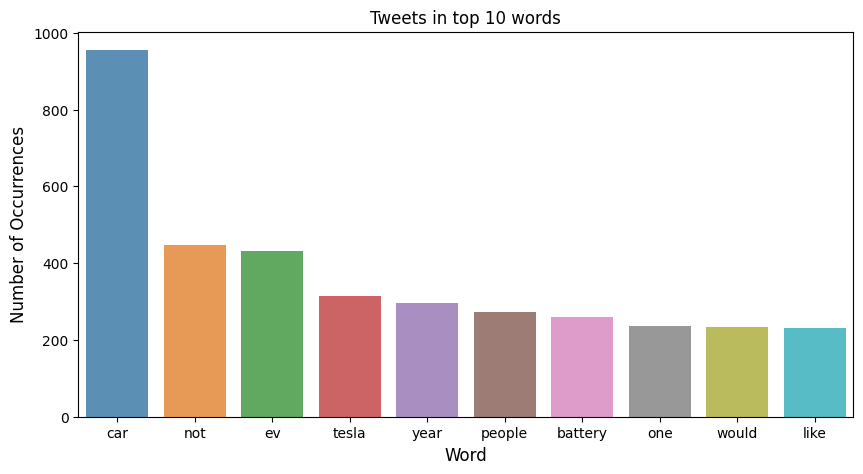

In [ ]:
# Visualize the top word counts

word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

In [ ]:
from PIL import Image
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


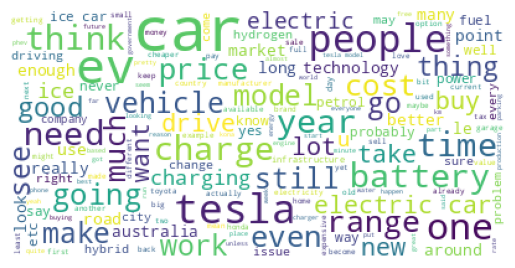

In [ ]:
corpus = list(Ozbargain_df['review_content_lemmatized'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
custom_stopwords = set(['ev', 'electric', 'people',"going"])  # Add any additional stopwords as needed


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove common words
# We will use lambda function here.
Ozbargain_df['review_content_lemmatized'] = Ozbargain_df['review_content_lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in custom_stopwords))
Ozbargain_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,review_content,review_content_stem,review_content_lemmatized
0,2020-02-20,pretty obvious conventional automakers droppin...,pretti obviou convent automak drop ice engin d...,pretty obvious conventional automaker dropping...
1,2020-02-20,could initial confusion new car buyers weather...,could initi confus new car buyer weather get i...,could initial confusion new car buyer weather ...
2,2020-02-20,elaborate personally see ev take increase infr...,elabor person see ev take increas infrastructu...,elaborate personally see take increase infrast...
3,2020-02-20,curious see lis batteries change expected time...,curiou see li batteri chang expect timelin wid...,curious see li battery change expected timelin...
4,2020-02-20,also c model options released market available...,also c model option releas market avail buyer ...,also c model option released market available ...


In [ ]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(Ozbargain_df['review_content_lemmatized']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Look at the top 10 words (you can write either word_frequency[:10] or word_frequency[0:10]. Both give the same result.)
word_frequency[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


car        955
not        447
tesla      315
year       295
battery    259
one        237
would      233
like       231
get        215
charge     196
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


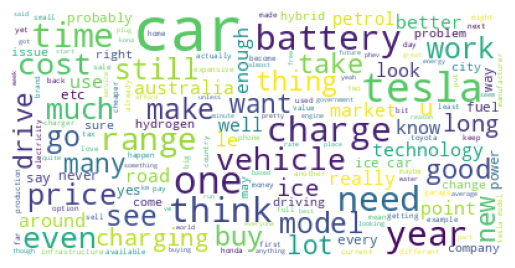

In [ ]:
corpus = list(Ozbargain_df['review_content_lemmatized'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bigrams

In [ ]:
bigrams_ev = get_ngrams(Ozbargain_df['review_content_lemmatized'].tolist(), ngram_range=(2, 2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bigrams_ev

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('ice car', 61),
 ('10 year', 53),
 ('tesla model', 39),
 ('charging station', 31),
 ('panel gap', 30),
 ('year old', 23),
 ('new car', 22),
 ('solar panel', 21),
 ('internal combustion', 21),
 ('petrol car', 20),
 ('car manufacturer', 19),
 ('car would', 19),
 ('20 year', 18),
 ('year ago', 18),
 ('40 minute', 18),
 ('next year', 17),
 ('combustion engine', 17),
 ('petrol station', 16),
 ('car not', 16),
 ('fuel cell', 16),
 ('battery technology', 15),
 ('long time', 15),
 ('door handle', 15),
 ('battery pack', 14),
 ('make sense', 14),
 ('nissan leaf', 14),
 ('buy car', 14),
 ('per 50', 14),
 ('50 000km', 14),
 ('15 year', 14),
 ('charge car', 13),
 ('need car', 13),
 ('fast charging', 13),
 ('old car', 13),
 ('second hand', 13),
 ('look like', 13),
 ('shopping centre', 12),
 ('running cost', 12),
 ('battery life', 12),
 ('ice vehicle', 12),
 ('hydrogen fuel', 12),
 ('fossil fuel', 12),
 ('last year', 12),
 ('not sure', 12),
 ('not even', 11),
 ('thing like', 11),
 ('car like', 11),

In [ ]:
bigrams_ev_df = pd.DataFrame(bigrams_ev)
bigrams_ev_df.columns=["Bi-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


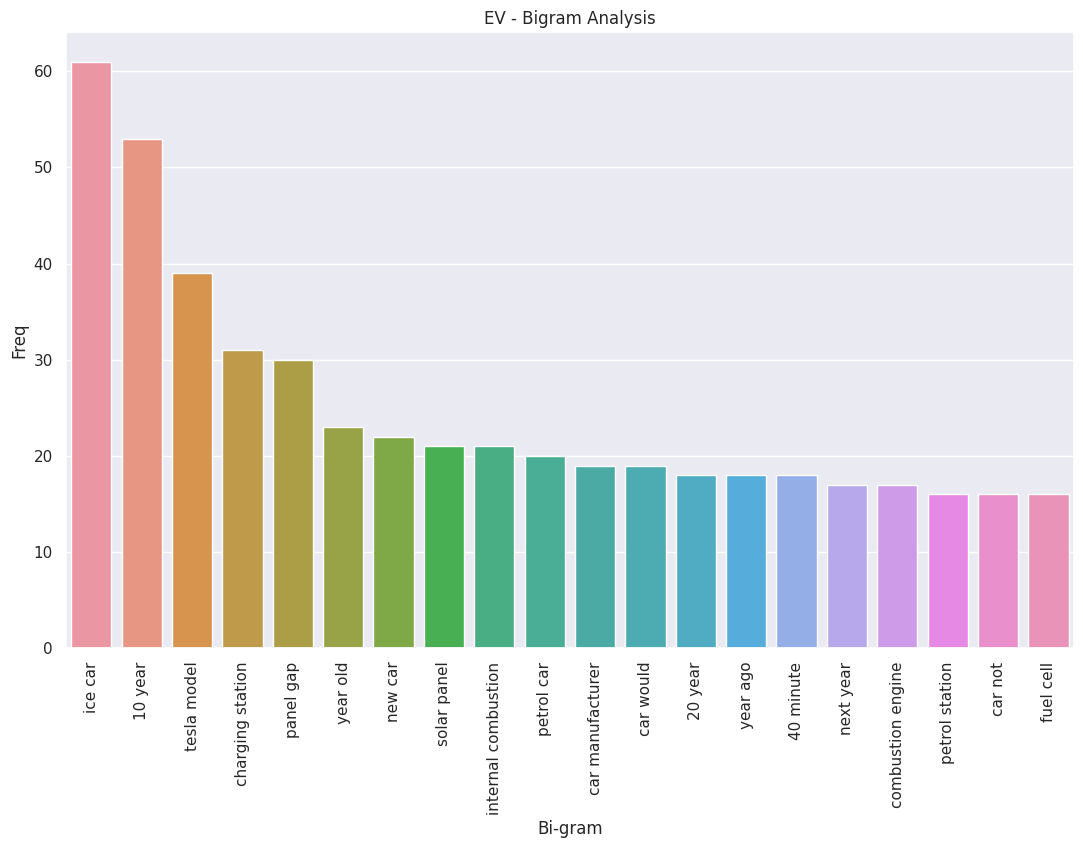

In [ ]:
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_ev_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('EV - Bigram Analysis')
plt.show()

Trigrams

In [ ]:
trigrams_ev = get_ngrams(Ozbargain_df['review_content_lemmatized'].tolist(), ngram_range=(3, 3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trigrams_ev_df = pd.DataFrame(trigrams_ev)
trigrams_ev_df.columns=["Tri-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


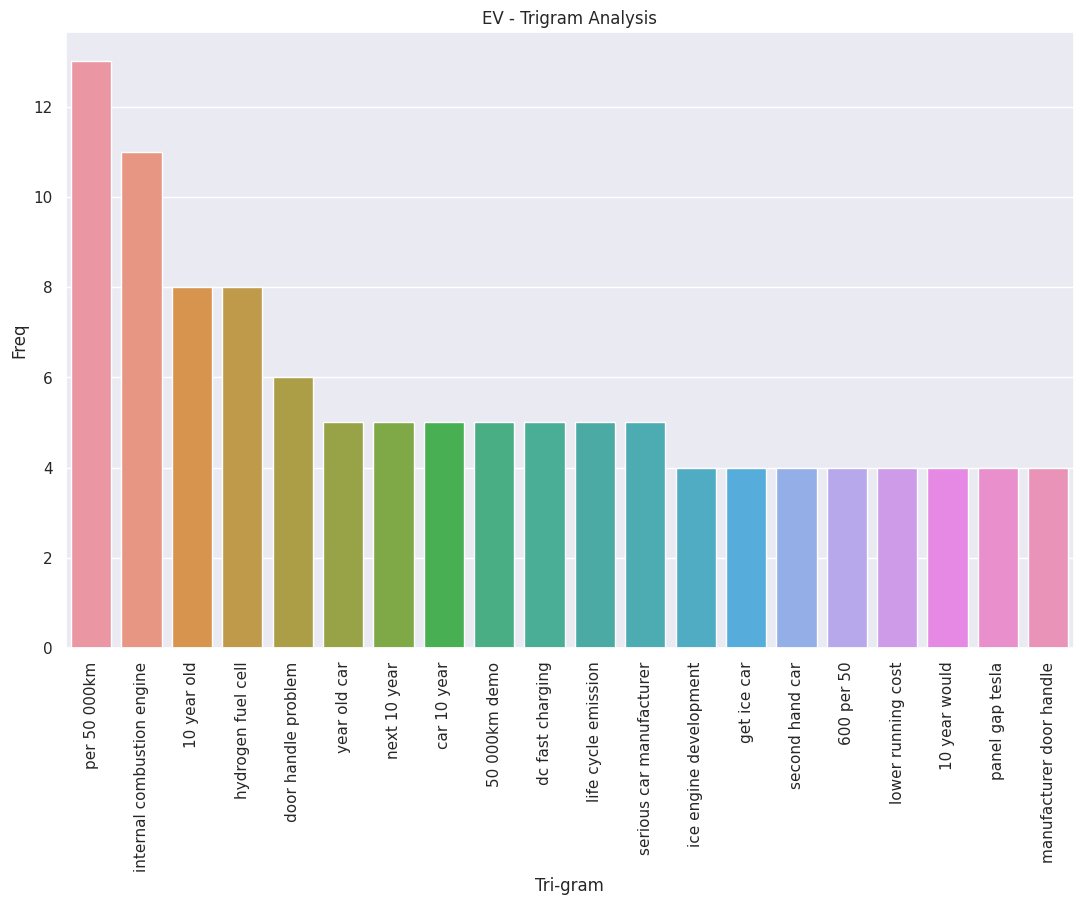

In [ ]:
# Barplot of most freq Tri-grams
top_trigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_ev_df[:top_trigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('EV - Trigram Analysis')
plt.show()

TEMPORAL ANALYSIS

In [ ]:
# Convert the 'date' column to datetime format
Ozbargain_df['date'] = pd.to_datetime(Ozbargain_df['date'])

# Group by date and count tweets
df_ev_date_wise = Ozbargain_df.groupby(Ozbargain_df['date'].dt.date)['review_content_lemmatized'].count().reset_index(name='review_content_count_ev').set_index('date')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_ev_date_wise.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_content_count_ev
date,
2015-07-14,2
2015-07-15,1
2015-07-26,3
2016-09-06,1
2018-01-05,1


In [ ]:
df_ev_date_wise.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_content_count_ev
date,
2020-04-21,1
2020-05-03,1
2020-06-03,4
2020-07-03,6
2020-08-03,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


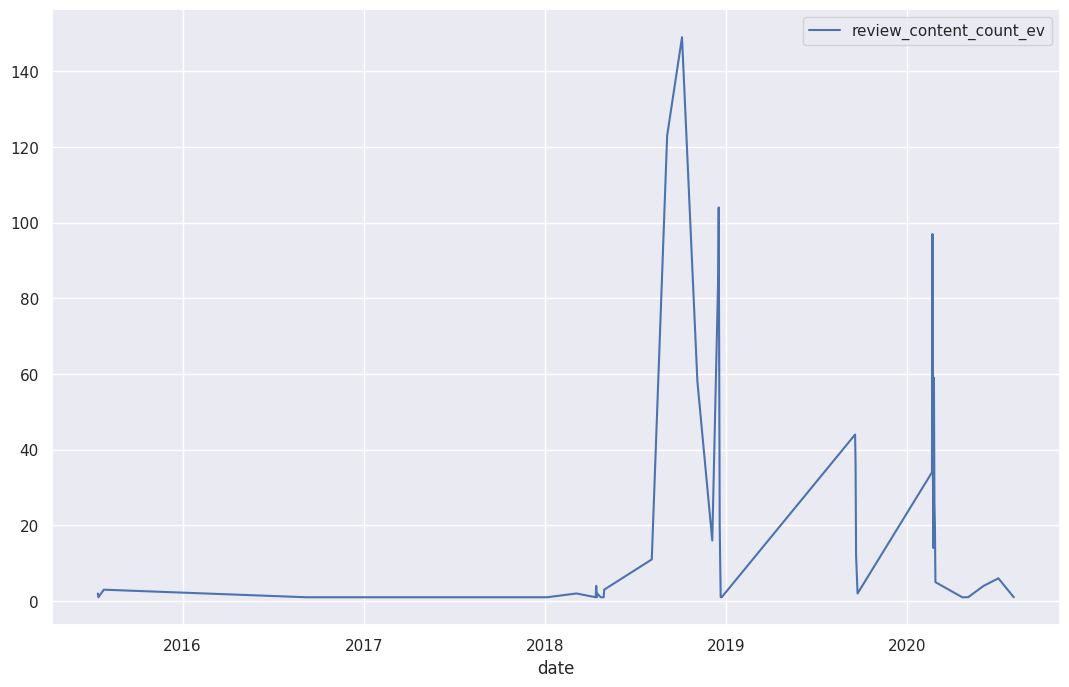

In [ ]:
ax = df_ev_date_wise.plot()
plt.savefig('temporal_analysis_v2.png', dpi=800)

SENTIMENT ANALYSIS

In [ ]:
from textblob import TextBlob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install textblob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Extract sentiments from the tweets (This should take some time because we run this to the entire dataset.)
Ozbargain_df['sentiment'] = Ozbargain_df['review_content_lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display first 50 tweets with respective sentiment value
Ozbargain_df[['review_content_lemmatized', 'sentiment']].head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_content_lemmatized,sentiment
0,pretty obvious conventional automaker dropping...,0.040584
1,could initial confusion new car buyer weather ...,0.029545
2,elaborate personally see take increase infrast...,0.165152
3,curious see li battery change expected timelin...,-0.100000
4,also c model option released market available ...,0.109524
5,tesla truck american enough said,0.000000
6,range convenience charging main hurdle conveni...,0.140741
7,yeah saw carwow vid,0.000000
8,average aussie would hope 700 1000km range car...,-0.068056
9,think ever get 1000km battery range see naive ...,-0.212500


In [ ]:
Ozbargain_df.groupby(['date'])['sentiment'].mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date
2015-07-14    0.127500
2015-07-15    0.191667
2015-07-26    0.050000
2016-09-06    0.272003
2018-01-05   -0.166667
2018-03-05    0.003646
2018-04-13    0.210390
2018-04-14    0.025852
2018-04-15    0.350000
2018-04-16    0.000000
2018-04-23    0.000000
2018-04-29    0.450000
2018-04-30    0.133333
2018-08-04    0.039104
2018-09-04    0.086343
2018-10-04    0.069698
2018-11-04    0.045252
2018-12-04    0.070438
2018-12-16    0.118877
2018-12-17    0.108885
2018-12-18    0.085666
2018-12-19    0.033180
2018-12-20    0.021445
2018-12-21   -0.037500
2018-12-23    0.103788
2019-09-18    0.107799
2019-09-19    0.093251
2019-09-20   -0.034101
2019-09-23    0.051786
2020-02-20    0.107300
2020-02-21    0.097715
2020-02-22    0.111976
2020-02-23    0.176323
2020-02-24    0.065645
2020-02-25    0.097680
2020-02-26    0.085767
2020-02-27   -0.017419
2020-04-21    0.100000
2020-05-03    0.100000
2020-06-03    0.106548
2020-07-03   -0.075340
2020-08-03    0.025000
Name: sentiment, dtype: float

In [ ]:
Ozbargain_df_date_wise = Ozbargain_df.groupby(['date'])['sentiment'].mean().reset_index(name='sentiment').set_index('date')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles


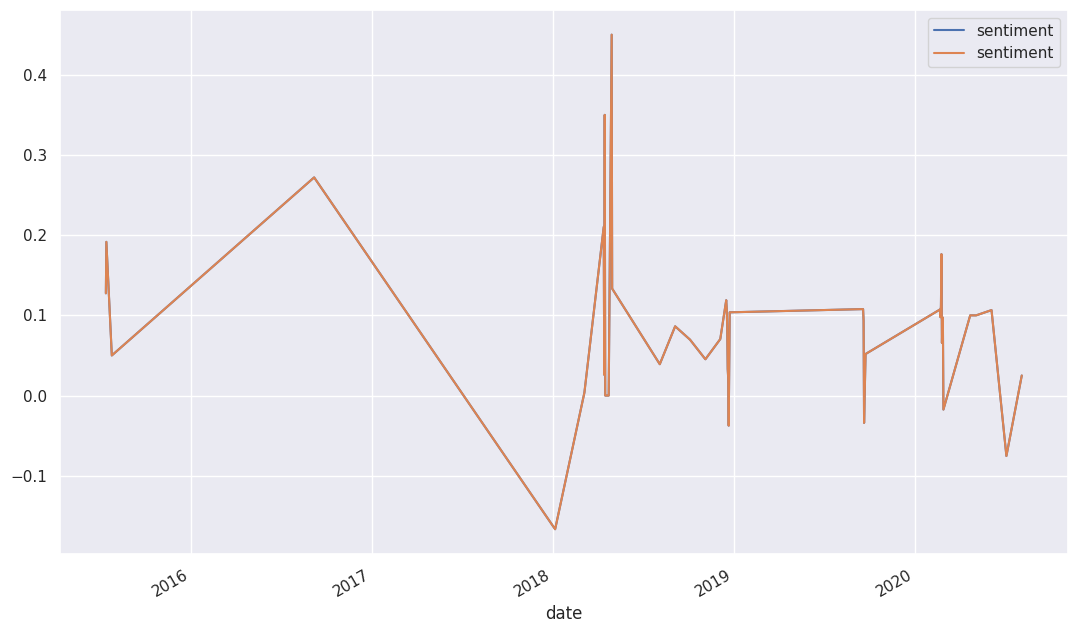

In [ ]:
# Plot twitter sentimet timeline over each provider
ax = Ozbargain_df_date_wise.plot()
Ozbargain_df_date_wise.plot(ax=ax)
plt.savefig('temporal_sentiment_v2.png', dpi=800)

In [ ]:
# Setting up the environment for LDA algorithm.

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the tweets as the text corpus.
corpus = list(Ozbargain_df['review_content'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pretty obvious conventional automakers dropping ice engine development together prepare impending paradigm shift electric cars could initial confusion new car buyers weather get ice car next 5 years scenario make existing ice cars cheaper happen petrol stations',
 'could initial confusion new car buyers weather get ice car next 5 years 5yrs falls place extent scenario make existing ice cars cheaper unlikely short time still cost x amount produce need ev account far greater purchases bring cost happen petrol stations still plenty ice hybrid cars trucks bikes road currently need petrol',
 'elaborate personally see ev take increase infrastructure better supports b prices drop reasonable levels ideally believe want solar panels battery storage home charge car night cost cent go work back average aussie would hope 700 1000km range car replace family car hope cost purchasing would cover savings not ridiculous say 10 000 ice equivalent everything starts falling place adopt technology look h

In [ ]:
# Tokenization
Oz_text = [[word for word in str(document).split()] for document in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Oz_text[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['pretty',
  'obvious',
  'conventional',
  'automakers',
  'dropping',
  'ice',
  'engine',
  'development',
  'together',
  'prepare',
  'impending',
  'paradigm',
  'shift',
  'electric',
  'cars',
  'could',
  'initial',
  'confusion',
  'new',
  'car',
  'buyers',
  'weather',
  'get',
  'ice',
  'car',
  'next',
  '5',
  'years',
  'scenario',
  'make',
  'existing',
  'ice',
  'cars',
  'cheaper',
  'happen',
  'petrol',
  'stations'],
 ['could',
  'initial',
  'confusion',
  'new',
  'car',
  'buyers',
  'weather',
  'get',
  'ice',
  'car',
  'next',
  '5',
  'years',
  '5yrs',
  'falls',
  'place',
  'extent',
  'scenario',
  'make',
  'existing',
  'ice',
  'cars',
  'cheaper',
  'unlikely',
  'short',
  'time',
  'still',
  'cost',
  'x',
  'amount',
  'produce',
  'need',
  'ev',
  'account',
  'far',
  'greater',
  'purchases',
  'bring',
  'cost',
  'happen',
  'petrol',
  'stations',
  'still',
  'plenty',
  'ice',
  'hybrid',
  'cars',
  'trucks',
  'bikes',
  'road',

In [ ]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(Oz_text)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'Oz.dict'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-09-30 11:12:00,311 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2023-09-30 11:12:00,365 : INFO : built Dictionary<6254 unique tokens: ['5', 'automakers', 'buyers', 'car', 'cars']...> from 1058 documents (total 36703 corpus positions)
2023-09-30 11:12:00,367 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<6254 unique tokens: ['5', 'automakers', 'buyers', 'car', 'cars']...> from 1058 documents (total 36703 corpus positions)", 'datetime': '2023-09-30T11:12:00.367244', 'gensim': '4.3.2', 'python': '3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]', 'platform': 'Linux-5.15.120+-x86_64-with-glibc2.35', 'e

In [ ]:
print(Oz_text[0])
print('alphabetically sorted', sorted(Oz_text[0]))

['pretty', 'obvious', 'conventional', 'automakers', 'dropping', 'ice', 'engine', 'development', 'together', 'prepare', 'impending', 'paradigm', 'shift', 'electric', 'cars', 'could', 'initial', 'confusion', 'new', 'car', 'buyers', 'weather', 'get', 'ice', 'car', 'next', '5', 'years', 'scenario', 'make', 'existing', 'ice', 'cars', 'cheaper', 'happen', 'petrol', 'stations']
alphabetically sorted ['5', 'automakers', 'buyers', 'car', 'car', 'cars', 'cars', 'cheaper', 'confusion', 'conventional', 'could', 'development', 'dropping', 'electric', 'engine', 'existing', 'get', 'happen', 'ice', 'ice', 'ice', 'impending', 'initial', 'make', 'new', 'next', 'obvious', 'paradigm', 'petrol', 'prepare', 'pretty', 'scenario', 'shift', 'stations', 'together', 'weather', 'years']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(Oz_text[1])
print('alphabetically sorted', sorted(Oz_text[1]))

['could', 'initial', 'confusion', 'new', 'car', 'buyers', 'weather', 'get', 'ice', 'car', 'next', '5', 'years', '5yrs', 'falls', 'place', 'extent', 'scenario', 'make', 'existing', 'ice', 'cars', 'cheaper', 'unlikely', 'short', 'time', 'still', 'cost', 'x', 'amount', 'produce', 'need', 'ev', 'account', 'far', 'greater', 'purchases', 'bring', 'cost', 'happen', 'petrol', 'stations', 'still', 'plenty', 'ice', 'hybrid', 'cars', 'trucks', 'bikes', 'road', 'currently', 'need', 'petrol']
alphabetically sorted ['5', '5yrs', 'account', 'amount', 'bikes', 'bring', 'buyers', 'car', 'car', 'cars', 'cars', 'cheaper', 'confusion', 'cost', 'cost', 'could', 'currently', 'ev', 'existing', 'extent', 'falls', 'far', 'get', 'greater', 'happen', 'hybrid', 'ice', 'ice', 'ice', 'initial', 'make', 'need', 'need', 'new', 'next', 'petrol', 'petrol', 'place', 'plenty', 'produce', 'purchases', 'road', 'scenario', 'short', 'stations', 'still', 'still', 'time', 'trucks', 'unlikely', 'weather', 'x', 'years']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the dictionary
print(dictionary.token2id)

{'5': 0, 'automakers': 1, 'buyers': 2, 'car': 3, 'cars': 4, 'cheaper': 5, 'confusion': 6, 'conventional': 7, 'could': 8, 'development': 9, 'dropping': 10, 'electric': 11, 'engine': 12, 'existing': 13, 'get': 14, 'happen': 15, 'ice': 16, 'impending': 17, 'initial': 18, 'make': 19, 'new': 20, 'next': 21, 'obvious': 22, 'paradigm': 23, 'petrol': 24, 'prepare': 25, 'pretty': 26, 'scenario': 27, 'shift': 28, 'stations': 29, 'together': 30, 'weather': 31, 'years': 32, '5yrs': 33, 'account': 34, 'amount': 35, 'bikes': 36, 'bring': 37, 'cost': 38, 'currently': 39, 'ev': 40, 'extent': 41, 'falls': 42, 'far': 43, 'greater': 44, 'hybrid': 45, 'need': 46, 'place': 47, 'plenty': 48, 'produce': 49, 'purchases': 50, 'road': 51, 'short': 52, 'still': 53, 'time': 54, 'trucks': 55, 'unlikely': 56, 'x': 57, '000': 58, '10': 59, '1000km': 60, '20': 61, '700': 62, 'adopt': 63, 'ago': 64, 'aussie': 65, 'average': 66, 'b': 67, 'back': 68, 'battery': 69, 'believe': 70, 'better': 71, 'celebrity': 72, 'cent': 7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in Oz_text]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in Oz_text]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-09-30 11:12:00,552 : INFO : collecting document frequencies
2023-09-30 11:12:00,554 : INFO : PROGRESS: processing document #0
2023-09-30 11:12:00,580 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 1058 documents and 6254 features (31328 matrix non-zeros)', 'datetime': '2023-09-30T11:12:00.580416', 'gensim': '4.3.2', 'python': '3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]', 'platform': 'Linux-5.15.120+-x86_64-with-glibc2.35', 'event': 'initialize'}


In [ ]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
total_topics = 40

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-09-30 11:12:00,614 : INFO : using symmetric alpha at 0.025
2023-09-30 11:12:00,617 : INFO : using symmetric eta at 0.025
2023-09-30 11:12:00,620 : INFO : using serial LDA version on this node
2023-09-30 11:12:00,655 : INFO : running online (single-pass) LDA training, 40 topics, 1 passes over the supplied corpus of 1058 documents, updating model once every 1058 documents, evaluating perplexity every 1058 documents, iterating 50x with a convergence threshold of 0.001000
2023-09-30 11:12:00,656 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-09-30

In [ ]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.013*"ev" + 0.012*"not" + 0.011*"tesla" + 0.007*"new" + 0.007*"car" + 0.007*"battery"'),
 (1,
  '0.015*"also" + 0.009*"car" + 0.008*"not" + 0.007*"much" + 0.007*"get" + 0.006*"vehicle"'),
 (2,
  '0.012*"car" + 0.011*"battery" + 0.009*"much" + 0.009*"electric" + 0.009*"like" + 0.009*"would"'),
 (3,
  '0.018*"car" + 0.012*"think" + 0.011*"tesla" + 0.009*"cars" + 0.007*"also" + 0.006*"not"'),
 (4,
  '0.025*"car" + 0.008*"one" + 0.007*"cars" + 0.007*"get" + 0.007*"people" + 0.006*"model"'),
 (5,
  '0.012*"car" + 0.008*"not" + 0.007*"cars" + 0.005*"one" + 0.005*"costs" + 0.005*"evs"'),
 (6,
  '0.009*"car" + 0.008*"cars" + 0.008*"not" + 0.007*"tesla" + 0.007*"like" + 0.007*"etc"'),
 (7,
  '0.020*"car" + 0.014*"people" + 0.012*"ev" + 0.012*"not" + 0.008*"electric" + 0.007*"like"'),
 (8,
  '0.022*"000km" + 0.013*"per" + 0.011*"50" + 0.011*"not" + 0.011*"car" + 0.008*"still"'),
 (9,
  '0.014*"car" + 0.013*"cars" + 0.011*"range" + 0.011*"not" + 0.010*"tesla" + 0.009*"like"'),
 (10,
  '0

In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9     -5.635520 -3.742781       1        1  9.153068
13    -6.294646 -3.855548       2        1  4.805151
21    -5.382833 -4.024303       3        1  4.339984
31    -5.608477 -3.741597       4        1  4.141661
19    -5.260498 -2.645079       5        1  4.120815
20    -5.853678 -3.655056       6        1  4.081181
10    -6.205364 -3.536083       7        1  3.793057
34    -4.438090 -3.575921       8        1  3.614041
26    -6.023553 -3.048841       9        1  3.543810
12    -4.579107 -3.095075      10        1  3.245315
18    -5.607950 -4.293980      11        1  2.916466
30    -5.223846 -3.527496      12        1  2.734157
16    -4.832070 -4.554506      13        1  2.307094
36    -6.044909 -4.171868      14        1  2.251950
6     -6.696922 -4.006913      15        1  2.219627
33    -5.351812 -3.915247      16        1  2.103322
35    -5.761775 -3.689216      17        1  2.072445
23    -5.585760 -4.209702      18        1  2.044128
15    -6.328132 -3.060907      19        1  2.024451
39    -5.703104 -3.693995      20        1  2.003879
29    -4.817417 -3.150378      21        1  1.979968
17    -5.450213 -4.332916      22        1  1.962765
32    -5.485075 -3.597176      23        1  1.911431
0     -5.105542 -3.616601      24        1  1.820805
4     -4.817769 -3.399149      25        1  1.781320
24    -6.436918 -2.897853      26        1  1.720422
28    -5.357374 -3.681595      27        1  1.657362
25    -5.682238 -2.989354      28        1  1.644295
27    -5.862813 -3.478056      29        1  1.596402
7     -6.146590 -3.816121      30        1  1.570124
11    -5.546761 -3.739952      31        1  1.560627
2     -6.029807 -3.030756      32        1  1.512884
3     -6.138397 -3.568476      33        1  1.470749
38    -4.746905 -4.300214      34        1  1.470749
37    -4.160968 -3.231198      35        1  1.470749
1     -4.693534 -2.745702      36        1  1.470749
5     -5.134216 -2.816266      37        1  1.470749
14    -5.775289 -3.540944      38        1  1.470749
22    -4.528079 -3.971008      39        1  1.470749
8     -5.897529 -4.958650      40        1  1.470749, topic_info=           Term       Freq      Total Category  logprob  loglift
3           car  11.000000  11.000000  Default  30.0000  30.0000
121       tesla   5.000000   5.000000  Default  29.0000  29.0000
11     electric   4.000000   4.000000  Default  28.0000  28.0000
69      battery   3.000000   3.000000  Default  27.0000  27.0000
100         not   8.000000   8.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
108       range   0.049150   3.634594  Topic40  -5.5492  -0.0840
24       petrol   0.046110   2.332523  Topic40  -5.6130   0.2957
54         time   0.046915   3.376117  Topic40  -5.5957  -0.0567
506   australia   0.042969   1.543295  Topic40  -5.6835   0.6382
120  technology   0.042560   1.372357  Topic40  -5.6931   0.7460

[2936 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3         1  0.087679       car
3         2  0.087679       car
3         6  0.087679       car
3         7  0.087679       car
4         1  0.133088      cars
4         4  0.133088      cars
11        2  0.241300  electric
40        1  0.173460        ev
40        6  0.173460        ev
16        1  0.296373       ice
485       1  0.215308      like
19        1  0.399460      make
100       1  0.115288       not
100       4  0.115288       not
108       1  0.275134     range
121       1  0.170482     tesla, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 14, 22, 32, 20, 21, 11, 35, 27, 13, 19, 31, 17, 37, 7, 34, 36, 24, 16, 40, 30, 18, 33, 1, 5, 25, 29, 26, 28, 8, 12, 3, 4, 39, 38, 2, 6, 15, 23, 9])